In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('preprocessedTrain.csv')

In [3]:
data.head()

,Title,Body,Tags
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript image overlay react-native opacity
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift operators whitespace ternary-operator op...
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android material-design floating-action-button


In [4]:
def tag_count(x):
    x = len(x.split())
    return x

count = lambda x:tag_count(x)

data['TagCount'] = pd.DataFrame(data.Tags.apply(count))
print("The tag count is calculated...")

The tag count is calculated...


In [5]:
#data['TagCount'].describe
print("The max value of tags in a question are: ",data['TagCount'].max())
print("The min value of tags in a question are: ",data['TagCount'].min())

The max value of tags in a question are:  6
The min value of tags in a question are:  1


In [6]:
data['TagCount'].value_counts()

2    13759
3    11940
1     8410
4     6779
5     4111
6        1
Name: TagCount, dtype: int64

In [7]:
data = data[data['TagCount'] != 6]

In [8]:
data['TagCount'].value_counts()

2    13759
3    11940
1     8410
4     6779
5     4111
Name: TagCount, dtype: int64

C:\Users\ankit\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


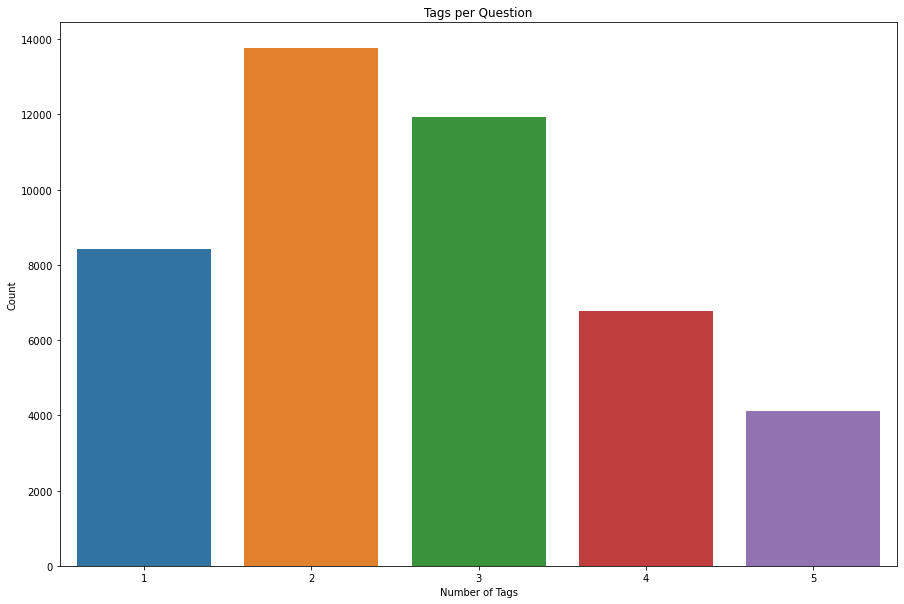

In [9]:
plt.figure(figsize = (15,10))
sns.countplot(data['TagCount'])
plt.title('Tags per Question')
plt.xlabel('Number of Tags')
plt.ylabel('Count')
plt.savefig('tagCount.jpg')
plt.show()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x:x.split())
tag_dtm = vectorizer.fit_transform(data['Tags'])

In [11]:
print("Number of data points: ",tag_dtm.shape[0])
print("Number of unique tags: ",tag_dtm.shape[1])

Number of data points:  44999
Number of unique tags:  9336


In [12]:
tags=vectorizer.get_feature_names()
print("Some of the tags in the dataset: ",tags[:10])

Some of the tags in the dataset:  ['.class-file', '.d.ts', '.htaccess', '.net', '.net-1.1', '.net-2.0', '.net-4.5', '.net-4.6', '.net-4.6.1', '.net-4.6.2']


In [13]:
freq = tag_dtm.sum(axis=1).A1
result = dict(zip(tags,freq))

In [17]:
#type(result)
import csv
with open('tag_counts_dict_dtm.csv','w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in result.items():
        writer.writerow([key, value])
    
print("csv file generated for count....")
tag_df=pd.read_csv('tag_counts_dict_dtm.csv', names = ['tag','count'])
print(tag_df.head())

csv file generated for count....
           tag  count
0  .class-file      2
1        .d.ts      2
2    .htaccess      5
3         .net      5
4     .net-1.1      3


In [18]:
tag_df_sorted = tag_df.sort_values(['count'], ascending = False)
tag_counts = tag_df_sorted['count'].values

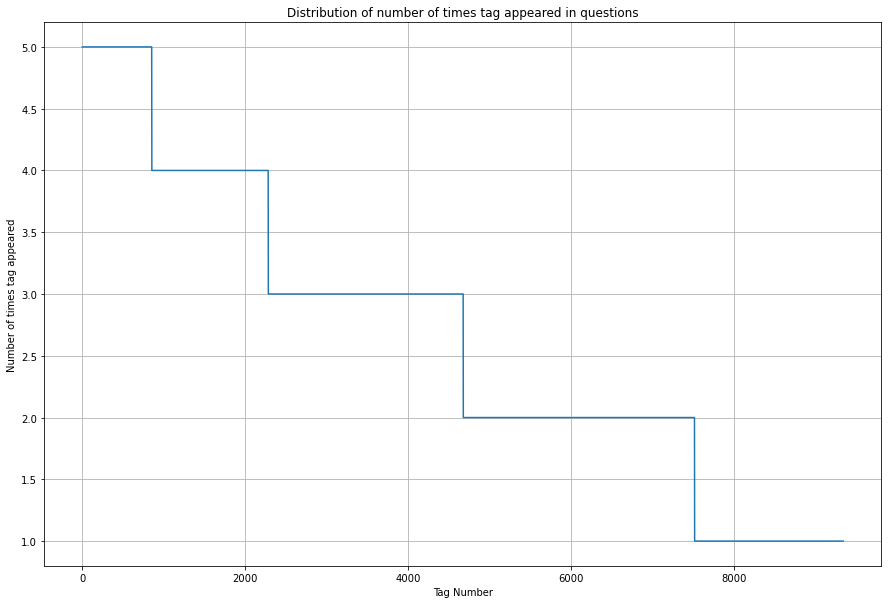

In [19]:
plt.figure(figsize=(15,10))
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared in questions")
plt.grid()
plt.xlabel("Tag Number")
plt.ylabel("Number of times tag appeared")
plt.savefig('tagDistribution.jpg')
plt.show()

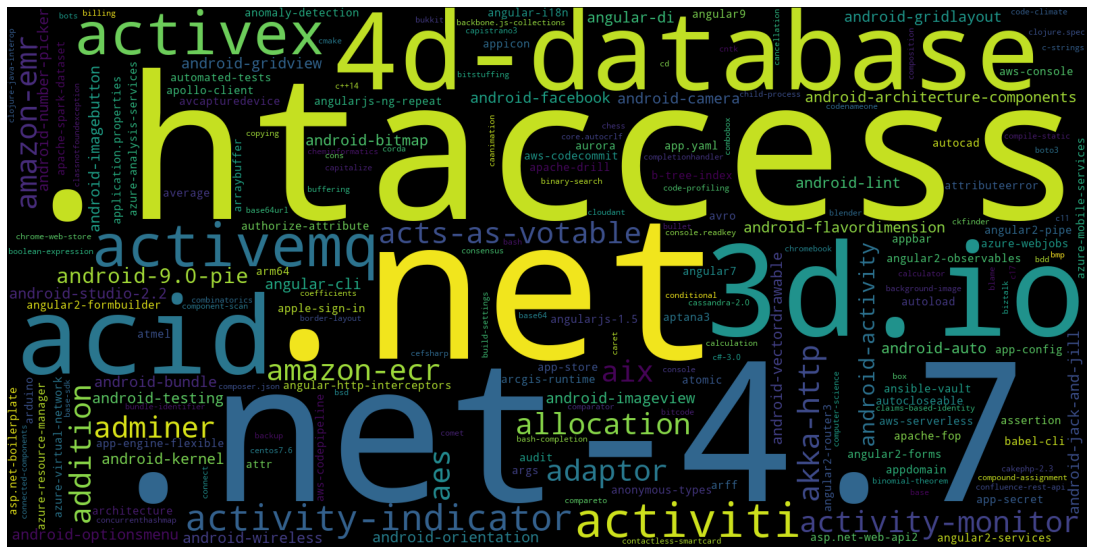

In [24]:
from wordcloud import WordCloud
tup = dict(result.items())
wordcloud = WordCloud(
                background_color = "black",
                width = 1600,
                height = 800
            ).generate_from_frequencies(tup)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.savefig('wordcloud.jpg')
plt.show()